# Stellar & Nebular Emission - BPASS

In the BPASS SPS models nebular extinction and continuum emission were added using Cloudy by the BPASS collaboration using a "sensible set of defaults".

In [17]:
import numpy as np
from scipy.interpolate import interp1d
from lightning.stellar import BPASSModel, PEGASEModel
from lightning.sfh import PiecewiseConstSFH
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('lightning.plots.style.lightning-serif')
%matplotlib inline

## Initialize Model
Here we'll initialize our sort of 'default' stellar population model, which is integrated over stellar age bins to be used with a piecewise-constant SFH. We'll do it three times, with and without binary stellar evolution and the nebular component, to compare.

In [3]:
wave_grid = np.logspace(np.log10(0.01),
                        np.log10(10),
                        200)
filter_labels = ['SDSS_u', 'SDSS_g', 'SDSS_r', 'SDSS_i', 'SDSS_z',
                 'MOIRCS_J', 'MOIRCS_H', 'MOIRCS_Ks',
                 'IRAC_CH1', 'IRAC_CH2', 'IRAC_CH3', 'IRAC_CH4']
redshift = 0.0
age = [0, 1e7, 1e8, 1e9, 5e9, 13.4e9]

stars_sin = BPASSModel(filter_labels,
                       age=age,
                       redshift=redshift,
                       wave_grid=wave_grid,
                       binaries=False,
                       nebular_effects=False)

stars_neb = BPASSModel(filter_labels,
                       age=age,
                       redshift=redshift,
                       wave_grid=wave_grid,
                       binaries=True,
                       nebular_effects=True)

stars_noneb = BPASSModel(filter_labels,
                         age=age,
                         redshift=redshift,
                         wave_grid=wave_grid,
                         binaries=True,
                         nebular_effects=False)

Text(0.5, 1.0, 'With Binaries & Nebula ($\\log U=-2$)')

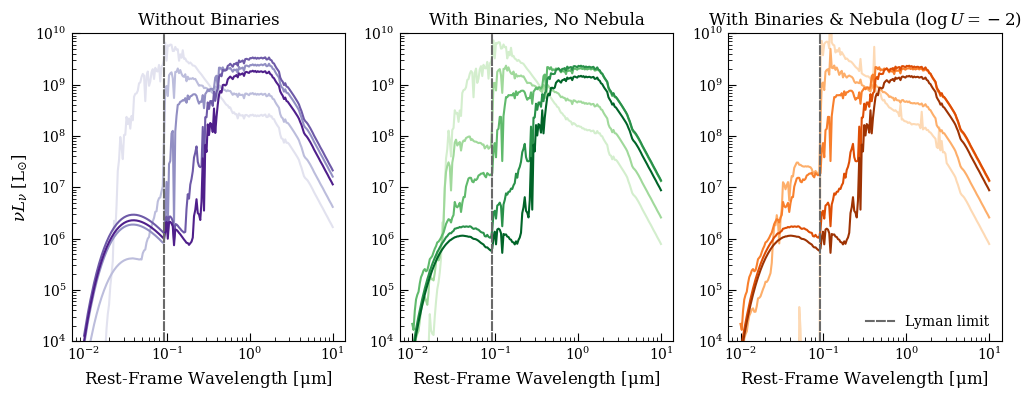

In [7]:
fig, axs = plt.subplots(1,3, figsize=(12,4))

Nmod = len(age) - 1

cm_sin = mpl.colormaps['Purples']
colors_sin = cm_sin(np.linspace(0.2, 0.9, Nmod))

cm_neb = mpl.colormaps['Oranges']
colors_neb = cm_neb(np.linspace(0.2, 0.9, Nmod))

cm_noneb = mpl.colormaps['Greens']
colors_noneb = cm_noneb(np.linspace(0.2, 0.9, Nmod))

for i in np.arange(Nmod):

    finterp = interp1d(stars_sin.wave_grid_rest, stars_sin.Lnu_obs[i,-3,:])
    # f1 = finterp(1)
    f1 = 1

    axs[0].plot(stars_sin.wave_grid_rest,
                stars_sin.nu_grid_obs * stars_sin.Lnu_obs[i,-3,:] / f1,
                color=colors_sin[i])

    finterp = interp1d(stars_noneb.wave_grid_rest, stars_noneb.Lnu_obs[i,-3,:])
    # f1 = finterp(1)
    f1 = 1

    axs[1].plot(stars_noneb.wave_grid_rest,
                stars_noneb.nu_grid_obs * stars_noneb.Lnu_obs[i,-3,:] / f1,
                color=colors_noneb[i])

    finterp = interp1d(stars_neb.wave_grid_rest, stars_neb.Lnu_obs[i,-3,2,:])
    # f1 = finterp(1)
    f1 = 1

    axs[2].plot(stars_neb.wave_grid_rest,
                stars_neb.nu_grid_obs * stars_neb.Lnu_obs[i,-3,2,:] / f1,
                color=colors_neb[i])

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(1e4, 1e10)
axs[0].axvline(0.0912, color='dimgray', linestyle='--', label='Lyman limit')
axs[0].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[0].set_ylabel(r'$\nu L_\nu\ [\rm L_{\odot}]$')
axs[0].set_title('Without Binaries')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(1e4, 1e10)
axs[1].axvline(0.0912, color='dimgray', linestyle='--', label='Lyman limit')
# axs[1].legend(loc='lower right')

axs[1].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[1].set_title('With Binaries, No Nebula')

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_ylim(1e4, 1e10)
axs[2].axvline(0.0912, color='dimgray', linestyle='--', label='Lyman limit')
axs[2].legend(loc='lower right')

axs[2].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[2].set_title(r'With Binaries & Nebula ($\log U=-2$)')

Lighter colors here represent the younger age bins. Below, we look at the variation in the youngest age bin with metallicity:

Text(0.5, 1.0, 'With Binaries & Nebula ($\\log U=-2$)')

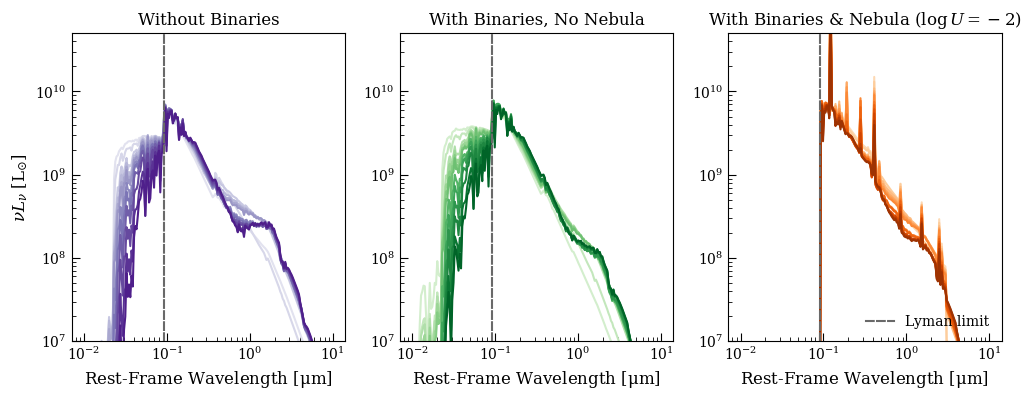

In [16]:
fig, axs = plt.subplots(1,3, figsize=(12,4))

Nmod = len(stars_neb.Zmet)

cm_sin = mpl.colormaps['Purples']
colors_sin = cm_sin(np.linspace(0.2, 0.9, Nmod))

cm_neb = mpl.colormaps['Oranges']
colors_neb = cm_neb(np.linspace(0.2, 0.9, Nmod))

cm_noneb = mpl.colormaps['Greens']
colors_noneb = cm_noneb(np.linspace(0.2, 0.9, Nmod))

for i in np.arange(Nmod):

    finterp = interp1d(stars_sin.wave_grid_rest, stars_sin.Lnu_obs[0,i,:])
    # f1 = finterp(1)
    f1 = 1

    axs[0].plot(stars_sin.wave_grid_rest,
                stars_sin.nu_grid_obs * stars_sin.Lnu_obs[0,i,:] / f1,
                color=colors_sin[i])

    finterp = interp1d(stars_noneb.wave_grid_rest, stars_noneb.Lnu_obs[0,i,:])
    # f1 = finterp(1)
    f1 = 1

    axs[1].plot(stars_noneb.wave_grid_rest,
                stars_noneb.nu_grid_obs * stars_noneb.Lnu_obs[0,i,:] / f1,
                color=colors_noneb[i])

    finterp = interp1d(stars_neb.wave_grid_rest, stars_neb.Lnu_obs[0,i,2,:])
    # f1 = finterp(1)
    f1 = 1

    axs[2].plot(stars_neb.wave_grid_rest,
                stars_neb.nu_grid_obs * stars_neb.Lnu_obs[0,i,2,:] / f1,
                color=colors_neb[i])

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(1e7, 5e10)
axs[0].axvline(0.0912, color='dimgray', linestyle='--', label='Lyman limit')
axs[0].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[0].set_ylabel(r'$\nu L_\nu\ [\rm L_{\odot}]$')
axs[0].set_title('Without Binaries')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(1e7, 5e10)
axs[1].axvline(0.0912, color='dimgray', linestyle='--', label='Lyman limit')
# axs[1].legend(loc='lower right')

axs[1].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[1].set_title('With Binaries, No Nebula')

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_ylim(1e7, 5e10)
axs[2].axvline(0.0912, color='dimgray', linestyle='--', label='Lyman limit')
axs[2].legend(loc='lower right')

axs[2].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[2].set_title(r'With Binaries & Nebula ($\log U=-2$)')

Here, we're looking at the 0-10 Myr population with metallicity ranging from $Z = 10^{-5}-0.04$. Lighter colors represent lower metallicities.

Now we zoom in on the differences between the models with and without binary stellar evolution in the optical-NIR portion of the spectrum, since they're less obvious than the differences in the Lyman continuum.

Text(0.5, 1.0, 'Binary / Single Models')

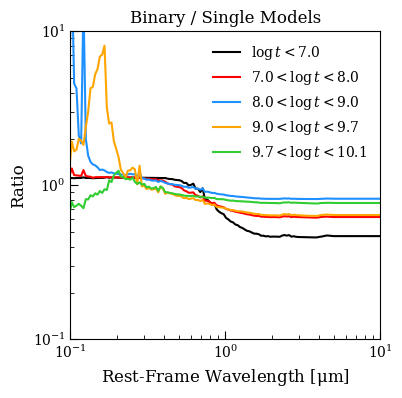

In [12]:
fig, ax = plt.subplots(figsize=(4,4))

# cm_noneb = mpl.colormaps['Greens']
# colors = cm_noneb(np.linspace(0.2, 0.9, Nmod))

for i in np.arange(Nmod):

    # finterp = interp1d(stars_sin.wave_grid_rest, stars_sin.Lnu_obs[i,:])
    # f1 = finterp(1)
    label = r'$%.1f < \log t < %.1f$' % (np.log10(age[i]), np.log10(age[i+1])) if age[i] != 0 else r'$\log t < %.1f$' % (np.log10(age[i+1]))
    
    ax.plot(stars_sin.wave_grid_rest,
            stars_noneb.Lnu_obs[i,-3,:] / stars_sin.Lnu_obs[i,-3,:],
            label = label)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.1, 10)
ax.set_xlim(0.1, 10)
ax.legend(loc='upper right')

ax.set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
ax.set_ylabel(r'Ratio')
ax.set_title('Binary / Single Models')

A lot of the difference between the two is in the NIR, where the binary stellar evolution prescriptions moderate the overproduction of AGB stars. On the blue side, we see significant differences in the absorption features of the 100 Myr - 1 Gyr population and the shape of the blue continuum in the 1 Gyr - 5 Gyr population.

Finally, we compare the underlying stellar population models to PEGASE, without any modification by the nebula.

In [13]:
bpass_sin = BPASSModel(filter_labels,
                       age=age,
                       redshift=redshift,
                       wave_grid=wave_grid,
                       binaries=False,
                       nebular_effects=False)

bpass_bin = BPASSModel(filter_labels,
                       age=age,
                       redshift=redshift,
                       wave_grid=wave_grid,
                       binaries=True,
                       nebular_effects=False)

pegase_noneb = PEGASEModel(filter_labels,
                           age=age,
                           redshift=redshift,
                           wave_grid=wave_grid,
                           nebular_effects=False)

(0.1, 10)

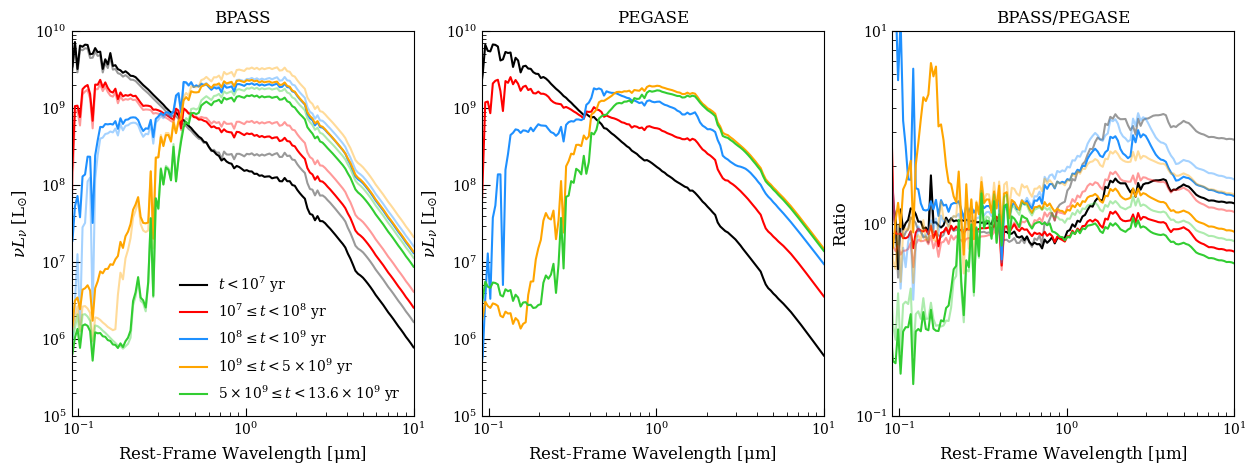

In [14]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

Nmod = len(age) - 1

labels = [r'$t < 10^7$ yr',
          r'$10^7 \leq t < 10^8$ yr',
          r'$10^8 \leq t < 10^9$ yr',
          r'$10^9 \leq t < 5 \times 10^9$ yr',
         r'$5 \times 10^9 \leq t < 13.6 \times 10^9$ yr']

for i in np.arange(Nmod):

    l,=axs[0].plot(bpass_sin.wave_grid_rest,
                 bpass_sin.nu_grid_obs * bpass_sin.Lnu_obs[i,-3,:], alpha=0.4)
    axs[0].plot(bpass_bin.wave_grid_rest,
                 bpass_bin.nu_grid_obs * bpass_bin.Lnu_obs[i,-3,:], color=l.get_color(),
                 label=labels[i])
    axs[1].plot(pegase_noneb.wave_grid_rest,
                pegase_noneb.nu_grid_obs * pegase_noneb.Lnu_obs[i,-3,:])
    l,=axs[2].plot(pegase_noneb.wave_grid_rest,
                bpass_sin.Lnu_obs[i,-3,:] / pegase_noneb.Lnu_obs[i,-3,:], alpha=0.4)
    axs[2].plot(pegase_noneb.wave_grid_rest,
                bpass_bin.Lnu_obs[i,-3,:] / pegase_noneb.Lnu_obs[i,-3,:], color=l.get_color())


axs[0].set_xscale('log')
axs[0].set_xlim(0.0912, 10)
axs[0].set_ylim(1e5, 1e10)
axs[0].set_yscale('log')
# axs[0].set_ylim(1e9, 5e17)
axs[0].legend(loc='lower right')

axs[0].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[0].set_ylabel(r'$\nu L_\nu\ [\rm L_{\odot}]$')
axs[0].set_title('BPASS')

axs[1].set_xscale('log')
axs[1].set_xlim(0.0912, 10)
axs[1].set_ylim(1e5, 1e10)
axs[1].set_yscale('log')
# axs[1].set_ylim(1e9, 5e17)
# axs[1].axvline(0.0912, color='dimgray', linestyle='--', label='Lyman limit')
# axs[1].legend(loc='lower right')

axs[1].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[1].set_ylabel(r'$\nu L_\nu\ [\rm L_{\odot}]$')
axs[1].set_title('PEGASE')

axs[2].set_xscale('log')
axs[2].set_xlim(0.0912, 10)
# axs[2].set_ylim(1e5, 1e10)
axs[2].set_yscale('log')
# axs[2].set_ylim(1e9, 5e17)
# axs[2].axvline(0.0912, color='dimgray', linestyle='--', label='Lyman limit')
# axs[2].legend(loc='lower right')

axs[2].set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
axs[2].set_ylabel('Ratio')
axs[2].set_title(r'BPASS/PEGASE')
axs[2].set_ylim(0.1,10)


In the first and third panels, desaturated colors are single stars. The red excess we can see is driven by evolved massive stars; it's moderated by the binary evolution prescriptions (e.g. stars are stripped by their companion before they join the AGB) such that we see it primarily in the 100 Myr - 1 Gyr bin, where the AGB stars are really taking over.